In [1]:
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Upper.csv")


In [4]:
df

,0,#,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
0,1,1,2019/03/13,239.0,-2.05,248.0,237.0,244.0,70458,11950.0
1,2,2,2019/03/12,245.0,4.26,246.0,234.0,235.0,94823,34300.0
2,3,3,2019/03/11,235.0,2.17,238.0,228.0,232.0,73683,164500.0
3,4,4,2019/03/10,230.0,0.00,234.0,226.0,230.0,41255,11500.0
4,5,5,2019/03/07,230.0,1.77,231.0,225.0,228.0,47328,46000.0
5,6,6,2019/03/06,226.0,0.89,226.0,222.0,223.0,25338,9040.0
6,7,7,2019/03/05,224.0,0.90,225.0,221.0,222.0,34553,11200.0
7,8,8,2019/03/03,222.0,-0.89,225.0,222.0,224.0,40964,105006.0
8,9,9,2019/02/27,224.0,0.45,228.0,223.0,224.0,26480,11200.0
9,10,10,2019/02/26,223.0,-0.45,225.0,221.0,225.0,34122,14941.0


In [5]:
df.head()

,0,#,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
0,1,1,2019/03/13,239.0,-2.05,248.0,237.0,244.0,70458,11950.0
1,2,2,2019/03/12,245.0,4.26,246.0,234.0,235.0,94823,34300.0
2,3,3,2019/03/11,235.0,2.17,238.0,228.0,232.0,73683,164500.0
3,4,4,2019/03/10,230.0,0.00,234.0,226.0,230.0,41255,11500.0
4,5,5,2019/03/07,230.0,1.77,231.0,225.0,228.0,47328,46000.0


In [6]:
df.tail()

,0,#,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
37,38,38,2019/01/17,311.0,9.89,311.0,283.0,283.0,57490,12440.0
38,39,39,2019/01/16,283.0,9.69,283.0,258.0,258.0,3690,14150.0
39,40,40,2019/01/15,258.0,9.79,258.0,235.0,235.0,3685,10320.0
40,41,41,2019/01/14,336.0,50.00,336.0,235.0,235.0,14295,13440.0
41,42,42,2019/01/13,224.0,0.00,224.0,224.0,224.0,51875,8960.0


In [7]:
df.describe()

,0,#,LTP,% Change,High,Low,Open,Qty.,Turnover
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,21.500000,21.500000,245.928571,1.310000,251.333333,237.785714,243.380952,86442.928571,8.230377e+05
std,12.267844,12.267844,26.051911,8.588531,29.689176,17.889274,23.282939,120871.419258,5.206044e+06
min,1.000000,1.000000,221.000000,-9.930000,224.000000,219.000000,220.000000,3685.000000,2.320000e+03
25%,11.250000,11.250000,226.000000,-1.840000,230.250000,223.250000,225.000000,41036.750000,9.240000e+03
50%,21.500000,21.500000,236.500000,-0.430000,238.000000,231.500000,235.000000,57514.500000,1.170000e+04
75%,31.750000,31.750000,259.500000,0.897500,264.500000,252.500000,258.000000,89538.000000,1.378500e+04
max,42.000000,42.000000,336.000000,50.000000,342.000000,283.000000,326.000000,729258.000000,3.375824e+07


In [8]:
df.isnull()

,0,#,Date,LTP,% Change,High,Low,Open,Qty.,Turnover
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [9]:
df.shape

(42, 10)

<Axes: title={'center': 'Closing Price in Months'}, xlabel='Date'>

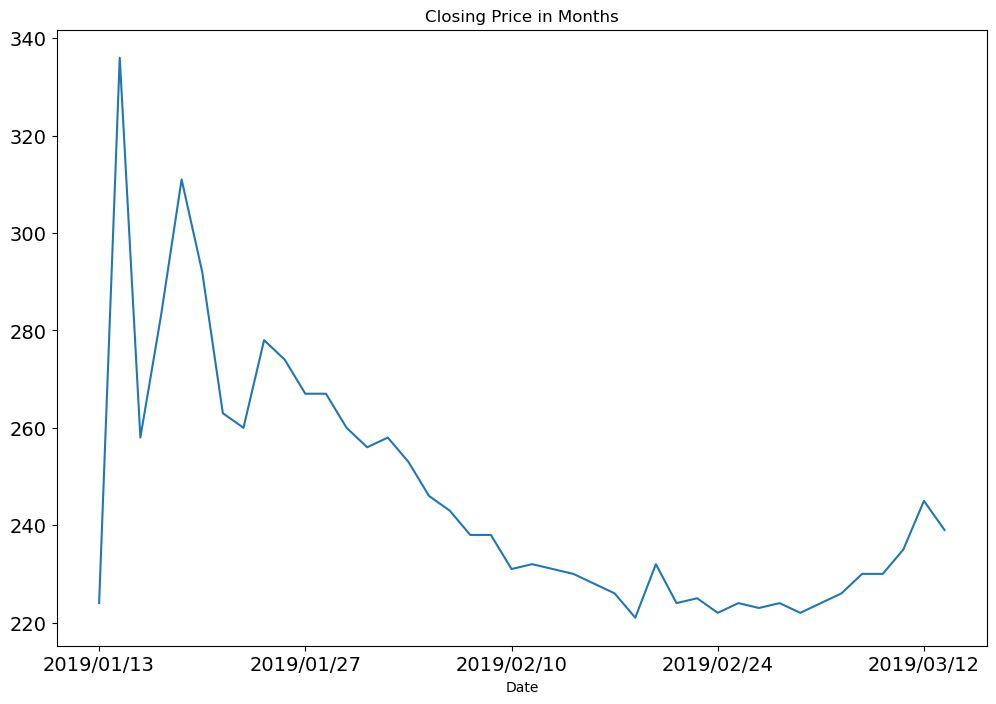

In [10]:
df1=df.groupby(['Date'])['LTP'].mean()
df1.plot(figsize=(12,8),title='Closing Price in Months',fontsize='14')

In [11]:
#df.groupby('Date')['LTP'].mean.plot.bar()


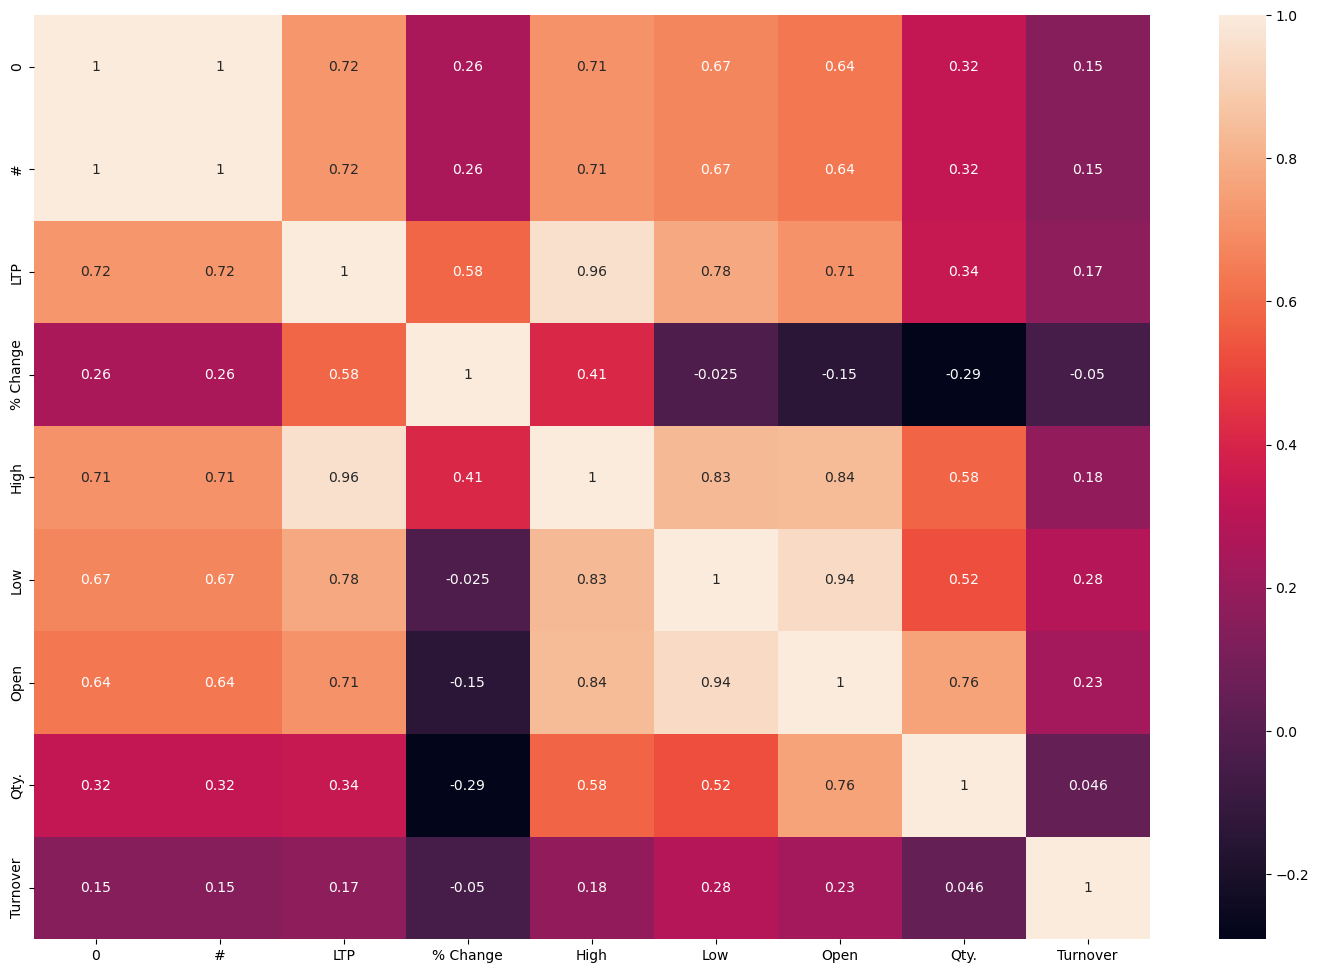

In [12]:
corr=df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True);

Text(0.5, 1.0, 'UPPER Cumulative Returns')

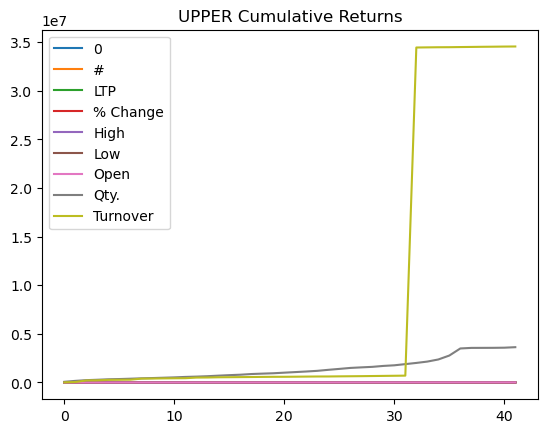

In [13]:
dr = df.cumsum()
dr.plot()
plt.title('UPPER Cumulative Returns')

Text(0.5, 1.0, 'Upper Autocorrelation plot')

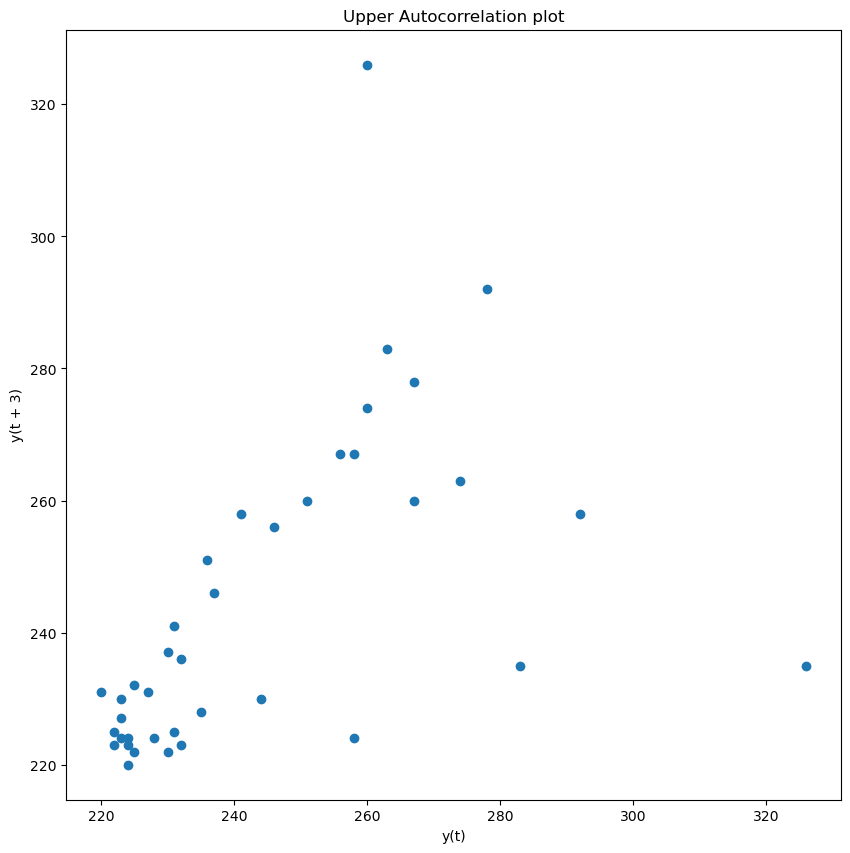

In [14]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=3)
plt.title('Upper Autocorrelation plot')

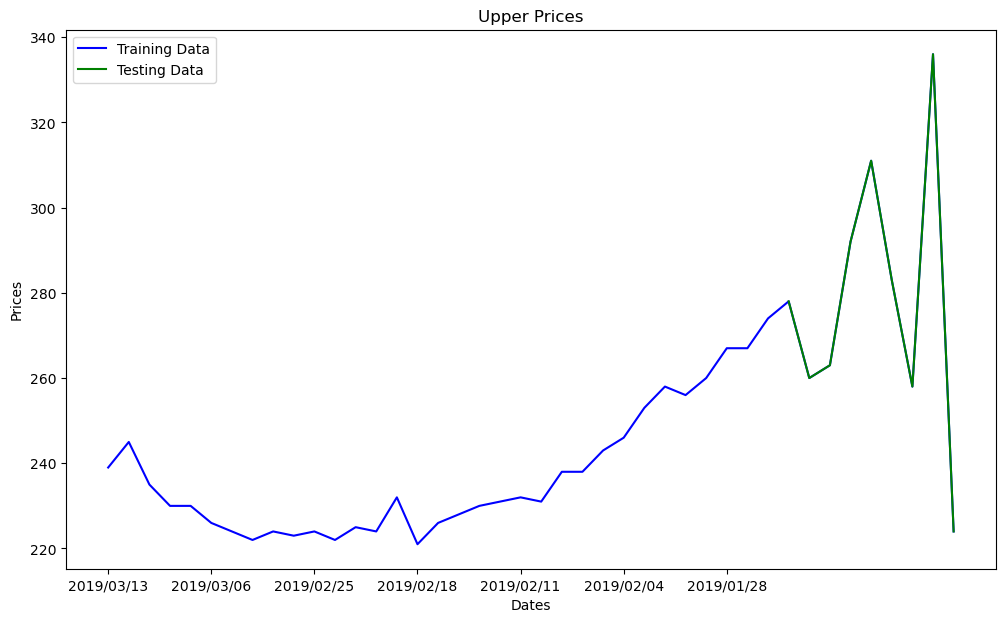

In [15]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Upper Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['LTP'], 'blue', label='Training Data')
plt.plot(test_data['LTP'], 'green', label='Testing Data')
plt.xticks(np.arange(0,31,5), df['Date'][0:31:5])
plt.legend()

In [16]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [17]:
train_ar = train_data['LTP'].values
test_ar = test_data['LTP'].values
history = [x for x in train_ar]
# print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 1957.499
Symmetric mean absolute percentage error: 11.872


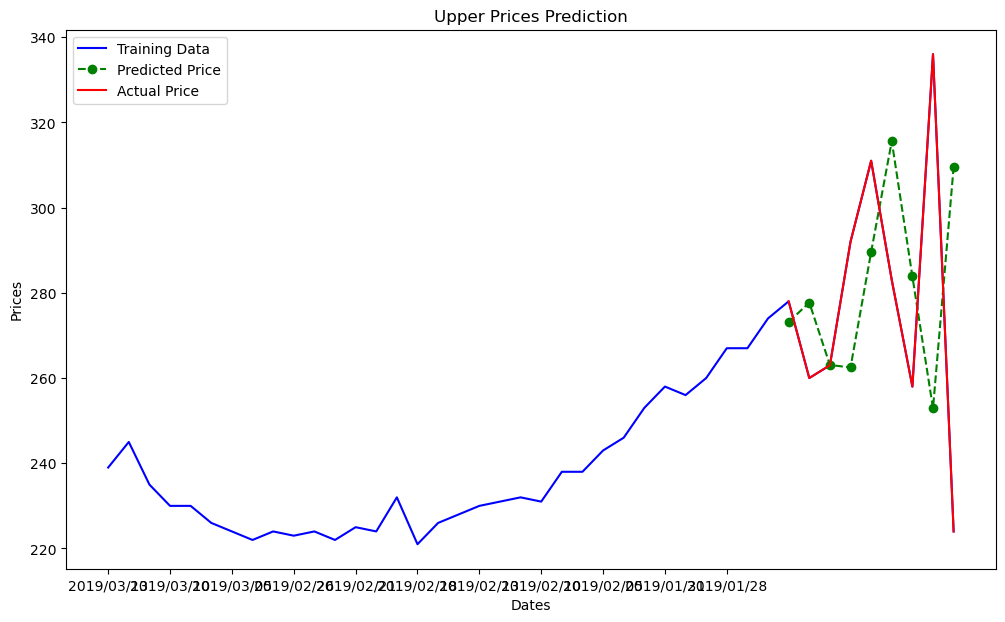

In [18]:
plt.figure(figsize=(12,7))
plt.plot(df['LTP'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['LTP'], color='red', label='Actual Price')
plt.title('Upper Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,31,3), df['Date'][0:31:3])
plt.legend()

In [19]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
df = pd.read_csv('Upperfinal.csv',usecols=["Date","LTP"])
df.index=df['Date']
df.head()

,Date,LTP
Date,,
2019/03/13,2019/03/13,239.0
2019/03/12,2019/03/12,245.0
2019/03/11,2019/03/11,235.0
2019/03/10,2019/03/10,230.0
2019/03/07,2019/03/07,230.0


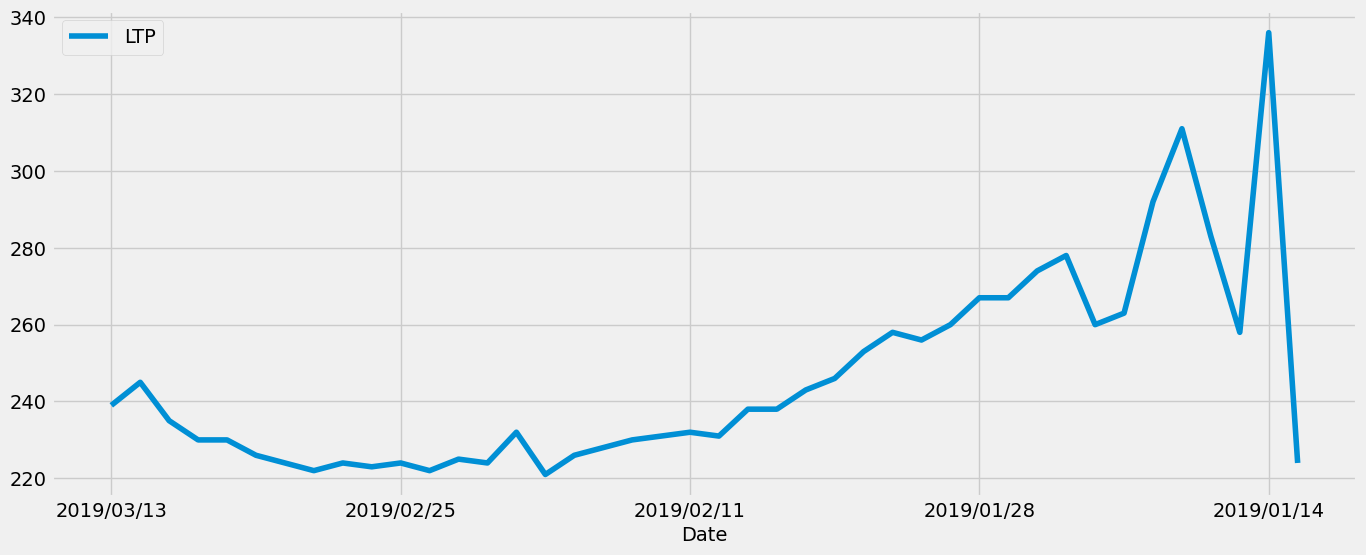

In [21]:
df.plot(figsize=(15, 6))
plt.show()

                 Date    LTP
Date                        
2019-03-13 2019-03-13  239.0
2019-03-12 2019-03-12  245.0
2019-03-11 2019-03-11  235.0
2019-03-10 2019-03-10  230.0
2019-03-07 2019-03-07  230.0


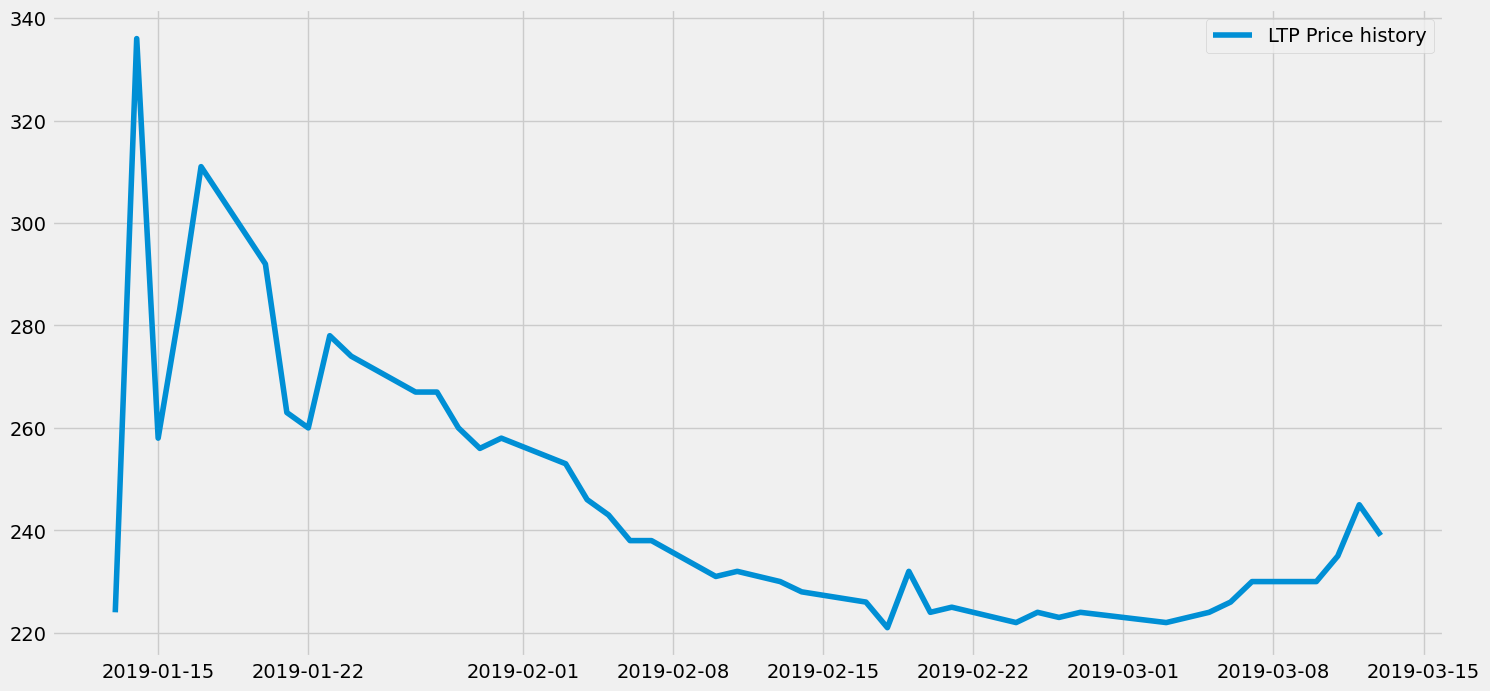

In [22]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
print(df.head())
#plot
plt.figure(figsize=(16,8))
plt.plot(df['LTP'], label='LTP Price history')
plt.legend()

In [23]:
# Define e p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


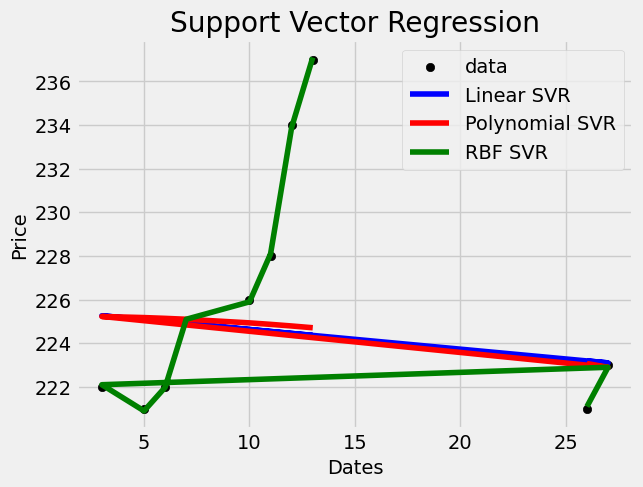

array([225.89948321])

In [24]:
import requests
#helps in http request
import json as simplejson
#used or json handling , better than json as it gives specific error code for incompatible json
import re
#used for string operations
import operator
#used for numerical operations
import sys
#used for system calls
import urllib.request
#used to get or push http url requests
import os
#used for instructing os to perform functions on file system
import csv
#handle csv files
import numpy as np
#used for scientific calculation
from sklearn.svm import SVR
#used for ml
import matplotlib.pyplot as matplt
#used for plotting graph
import pandas as pd
from datetime import datetime
from itertools import islice



# #INPUT THE COMPANY NAME
# if(len(sys.argv)<2):
# 	print('invalid string')
# 	exit()

# # query=sys.argv[1]
# #ACCESS THE YAHOO FINANACE URL FOR STOCK CODE
# yahoo_stock_code="http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=ORCL"
# yahoo_excess_code="&region=1&lang=en"
# stock_url=yahoo_stock_code+yahoo_excess_code
# response=requests.get(stock_url)
# # print(response)

# #CONEVRT THE JSON FILE INTO UTF-8 FORMAT FOR PARSING
# data=simplejson.loads(response.content.decode("utf-8"))

#FETCH THE FIRST COMPANY CODE
# code=data['ResultSet']['Result'][0]['symbol']
# print(code)

# #ACCESS THE YAHOO FINANACE API FOR DOWNLOADING THE DATA
# base_url = "http://ichart.finance.yahoo.com/table.csv?s="
# dataset_url=base_url+code
# print(dataset_url)

# #CREATE PATH FOR THE DOWNLOADED FILE
# output_path="C:/ml/stock_prediction/"
# output_path_new=output_path+code+"_new.csv"
# output_path=output_path+code+".csv"
# print(output_path)


# #USE URLLIB FOR THE DATA FILE DOWNLOAD
# try:
# 	urllib.request.urlretrieve(dataset_url,output_path)
# except urllib.request.ContentTooShortError as p:
# 	outfile=open(output_path,"w")
# 	outfile.write(p.content)
# 	outfile.close()
	
data = pd.read_csv('Upper.csv')

#WRITE THE FIRST i LINES OF DATA INTO A NEW FILE 
# a=open(output_path,"rb")
# b=open(output_path_new,"wb")
# reader=csv.reader(a,delimiter=',')
# f=csv.writer(b)

# i=1
# for line in reader:
# 	if i>20:
# 		break
# 	else:
# 		f.writerow(line)
# 		i=i+1	




# a.close()
# b.close()
# os.remove(output_path)

# #COVERT THE DATA INTO TWO ARRAYS OF DATE AND PRICE

date=[]
price=[]
LIMIT=10
for index, row in islice(data.iterrows(), LIMIT):
# for index , row in data.head(10):
#     print(row['Date'],row['Low'])
    date.append(int(row['Date'].split('/')[2]))
    price.append(float(row['Low']))
# with open(data) as datasource:
# 	r=csv.reader(datasource)
# 	next(r)
# 	for row in r:
# 		date.append(int(row[2].split('/')[2]))
# 		price.append(float(row[6]))

#reshape the date array into the numpy array of nX1
date=np.reshape(date,(len(date),1))
# print(date)
# print(price)



#DATA PREDICTION
#initialise svr, fit the models, predidct the model values
#kernel specifies the kernel type used in algorithm
#C is the error penalty
#gamma is the kernel coefficient
#degree is the polynomial degree in poly kernel



svr_lin=SVR(kernel='linear',C=1e3)
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)

# print(svr_lin)
svr_lin.fit(date,price)
svr_poly.fit(date,price)
svr_rbf.fit(date,price)



#PLOT THE DATA ON THE GRAPH

matplt.scatter(date,price,color='black',label='data')
matplt.plot(date,svr_lin.predict(date),color='blue',label='Linear SVR')
matplt.plot(date,svr_poly.predict(date),color='red',label='Polynomial SVR')
matplt.plot(date,svr_rbf.predict(date),color='green',label='RBF SVR')
matplt.xlabel('Dates')
matplt.ylabel('Price')
matplt.title('Support Vector Regression')
matplt.legend()
matplt.show()

# svr_lin=svr_lin.reshape(1,-1)
# svr_poly=svr_poly.reshape(1,-1)
# svr_rbf=svr_rbf.reshape(1,-1)

# svr_lin.predict(10)

svr_lin.predict([[10]])
svr_poly.predict([[10]])
svr_rbf.predict([[10]])



# os.remove(output_path_new)
# print('prediction over')